0
1
2
3
4
5
6
7
8
9


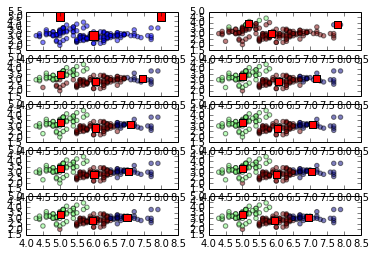

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


def shouldStop(oldCentroids, centroids, iterations):
    print(iterations)
    if iterations > 8: return True
    return (centroids==oldCentroids).all()

def distEclud(vecA, vecB):
    return np.sqrt(sum(np.power(vecA - vecB, 2))) 

def getLabels(dataSet, centroids):
    m = dataSet.shape[0];k = centroids.shape[0]
    clusterAssment=np.empty([m,2])
    for i in range(m):#for each data point assign it to the closest centroid
        minDist = float('inf'); minIndex = -1
        for j in range(k):
            distJI = distEclud(centroids[j,:],dataSet[i,:])
            if distJI < minDist:
                minDist = distJI; minIndex = j
        clusterAssment[i,:] = minIndex,minDist**2
    return clusterAssment
    
def getCentroids(dataSet, labels, k):    
    for cent in range(k):#recalculate centroids
        ptsInClust = dataSet[np.nonzero(labels[:,0]==cent)[0]]#get all the point in this cluster
        centroids[cent,:] = np.mean(ptsInClust, axis=0) #assign centroid to mean 
    return centroids
    
  
dataFile=[]
with open("/resources/data2d.csv") as inputfile:
    for line in inputfile:
        words = line.strip().split(',')
        dataFile.append(words)
dataSet=np.asarray(dataFile, dtype = float)  


# Initialize centroids randomly
centroids = np.asarray([[8., 5.], [5., 5.], [6., 3.]])

    
# Initialize book keeping vars.
numFeatures = 2
k=3
iterations = 0
oldCentroids = np.empty([k,2])
fig = plt.figure(1)
plt.clf()    
ax=fig.add_subplot(5,2,1)
ax.scatter(dataSet[:, 0], dataSet[:, 1],alpha=0.5)
ax.scatter(centroids[:, 0], centroids[:, 1],s=70, c=u'r', marker=u's')
# Run the main k-means algorithm
while not shouldStop(oldCentroids, centroids, iterations):
    oldCentroids = centroids.copy()
    iterations += 1
        
    # Assign labels to each datapoint based on centroids
    labels = getLabels(dataSet, centroids)
        
    # Assign centroids based on datapoint labels
    centroids = getCentroids(dataSet, labels, k)
    ax=fig.add_subplot(5,2,iterations+1)
    ax.scatter(dataSet[:, 0], dataSet[:, 1], c=labels[:,0],alpha=0.5)
    ax.scatter(centroids[:, 0], centroids[:, 1],s=50, c=u'r', marker=u's')
plt.show()